# CV Quantum Gate Visualization
Here, I am following the tutorial on [CV Quantum Gate Visualization](https://strawberryfields.ai/photonics/demos/run_gate_visualization.html)

In [5]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# Vacuum state, the lowest-energy Gaussian state
# Declare a program with a single mode
prog = sf.Program(1)
# apply the actual gate to the mode that we have
with prog.context as q:
    Vac | q[0]
    
eng = sf.Engine('gaussian')
state = eng.run(prog).state

In [13]:
print(state)

<GaussianState: num_modes=1, pure=True, hbar=2>


In [15]:
def wignerPlot(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

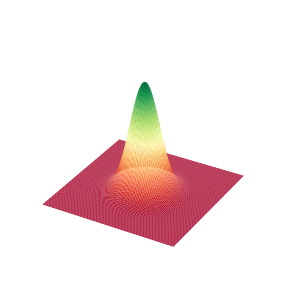

In [16]:
wignerPlot(state)

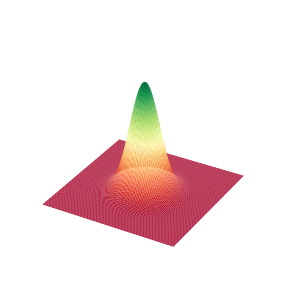

In [17]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

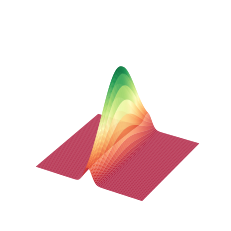

In [18]:
# squeezed quantum state
prog = sf.Program(1)
with prog.context as q:
    Sgate(1) | q[0]
    
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

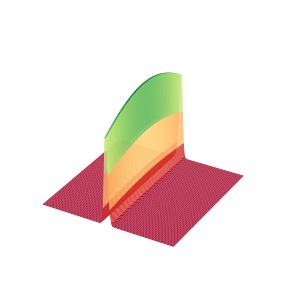

In [19]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    S | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

# BUG!!
Reusing the same gaussian backend, if you run a new circuit with a single squeezing operation:

```python
prog = sf.Program(1)
with prog.context as q:
    Sgate(1) | q[0]
```

multiple times, each time the quasiprobability distribution will change. Observe:

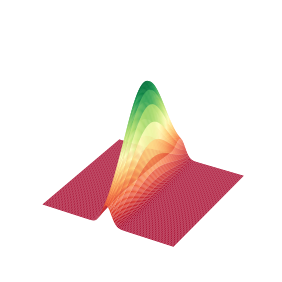

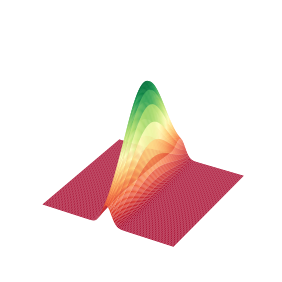

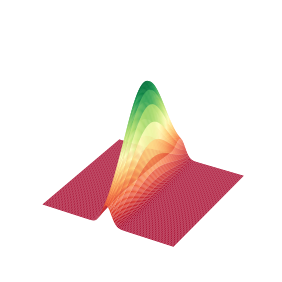

In [32]:
eng = sf.Engine('bosonic')

prog = sf.Program(1)
with prog.context as q:
    Sgate(1) | q[0]
    
prog2 = sf.Program(1)
with prog2.context as q:
    Sgate(1) | q[0]

prog3 = sf.Program(1)
with prog3.context as q:
    Sgate(1) | q[0]

prog4 = sf.Program(1)
with prog4.context as q:
    Coherent() | q[0]

#print("are the two circuits equal? ", prog == prog2) # returns False
#print("are the two states equal? ", state1 == state2) # returns False

state1 = eng.run(prog).state
state2 = eng.run(prog2).state

#state4 = eng.run(prog4).state
state3 = eng.run(prog3).state

wignerPlot(state1)
wignerPlot(state2)
wignerPlot(state3)
#wignerPlot(state4)
